# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [88]:
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

**Step 2:** Load the dataset _(done for you)_.

In [89]:
iris_data = load_iris()

In [90]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    ### BEGIN SOLUTION
    df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

    #rename the columns - remove the (cm)   
    df_iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

    # Add target and class to DataFrame
    df_iris['target'] = iris_data.target
    df_iris['class'] = iris_data.target_names[iris_data.target]
    
    return df_iris

df_iris = create_df()
    ### END SOLUTION

In [91]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [92]:
#From our data we will only get variable columns as np.array
x = 0
### BEGIN SOLUTION
x = df_iris.values[:,0:4]
x
### END SOLUTIONS

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [93]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [94]:
mergings = 0 
### BEGIN SOLUTION
samples = x
mergings = linkage(samples,method='complete')
### END SOLUTION

In [95]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

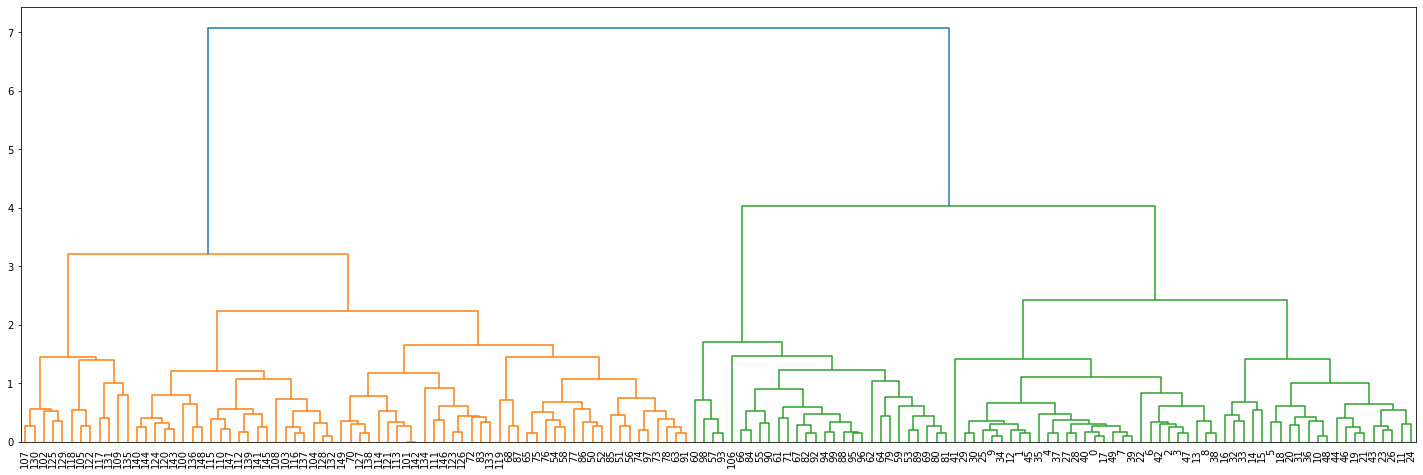

In [96]:
import matplotlib.pyplot as plt
dn = 0
### BEGIN SOLUTION
varieties = list(df_iris.index)
fig = plt.figure(figsize=(25,8))
dn = dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=10)
plt.show()
# END SOLUTION

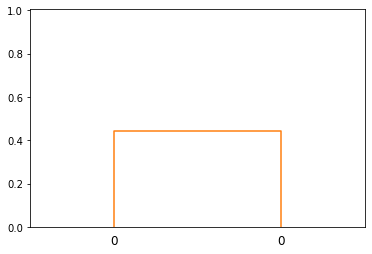

In [97]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [98]:
from sklearn.cluster import KMeans

df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [99]:
model = 0
### BEGIN SOLUTION
model = KMeans(n_clusters=3)
### END SOLUTION

In [100]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [101]:
### BEGIN SOLUTION
model.fit(points)
### END SOLUTION

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [102]:
### BEGIN SOLUTION
labels = model.predict(points)
### END SOLUTION

In [103]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [104]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    ### BEGIN SOLUTION
    for index in range(labels.shape[0]):
        if labels[index] == 0:
            data_0.append(points[index])
        elif labels[index] == 1:
            data_1.append(points[index])
        elif labels[index] == 2:
            data_2.append(points[index])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)

    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)
    
    ### END SOLUTION


In [105]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

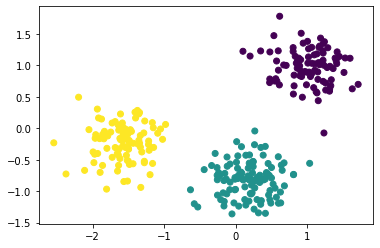

In [106]:
# plotting the data 

### BEGIN SOLUTION
plt.scatter(points[:,0],points[:,1], c=labels)
### END SOLUTION

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [107]:

### BEGIN SOLUTION
new_labels= model.predict(new_points)
### END SOLUTION


In [108]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [109]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

### BEGIN SOLUTION
new_0,new_1,new_2 =separate_labels(new_labels, new_points)
### END SOLUTION


In [110]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

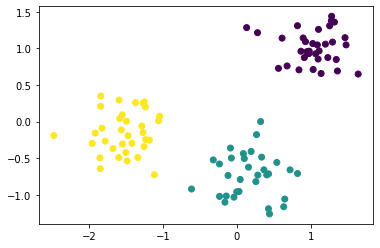

In [111]:
#plot the new labels


### BEGIN SOLUTION
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)
plt.show()
### END SOLUTION

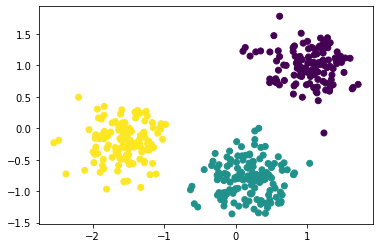

In [112]:
#plot all the points together

### BEGIN SOLUTION
plt.scatter(points[:,0],points[:,1], c=labels)
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)
plt.show()
### END SOLUTION